<a href="https://colab.research.google.com/github/URK21CO3006/codecave/blob/code-cave/Breast_cancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data.csv',encoding = "ISO-8859-1")

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis']=df['diagnosis'].replace({'B':0,'M':1})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
Q1=df['texture_mean'].quantile(.25)
Q3=df['texture_mean'].quantile(.75)
print('IQR',Q3-Q1)

IQR 5.629999999999999


In [ ]:
Q1=df['area_mean'].quantile(.25)
Q3=df['area_mean'].quantile(.75)
print('IQR',Q3-Q1)

IQR 362.40000000000003


In [ ]:
Zscore=stats.zscore(df['area_mean'])
print('area_mean is: ',Zscore)

area_mean is:  0      0.984375
1      1.908708
2      1.558884
3     -0.764464
4      1.826229
         ...   
564    2.343856
565    1.723842
566    0.577953
567    1.735218
568   -1.347789
Name: area_mean, Length: 569, dtype: float64


In [ ]:
Zscore=stats.zscore(df['texture_mean'])
print('texture_mean: ',Zscore)

texture_mean:  0     -2.073335
1     -0.353632
2      0.456187
3      0.253732
4     -1.151816
         ...   
564    0.721473
565    2.085134
566    2.045574
567    2.336457
568    1.221792
Name: texture_mean, Length: 569, dtype: float64


In [ ]:
df['area_mean'].interpolate(method='linear',limit_direction='forward')

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

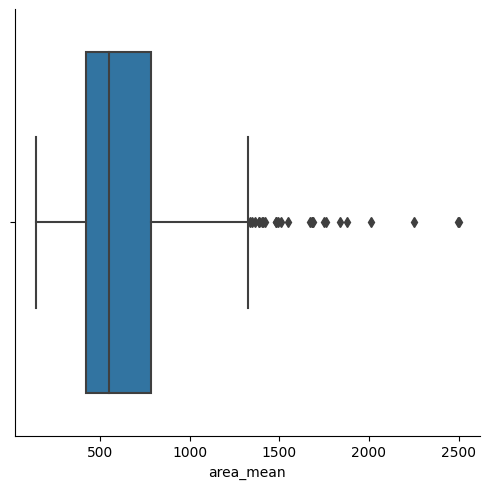

In [ ]:
sns.catplot(x='area_mean',kind='box',data=df)

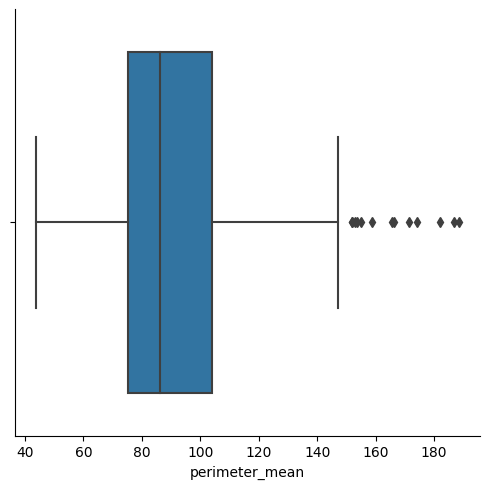

In [ ]:
sns.catplot(x='perimeter_mean',kind='box',data=df)

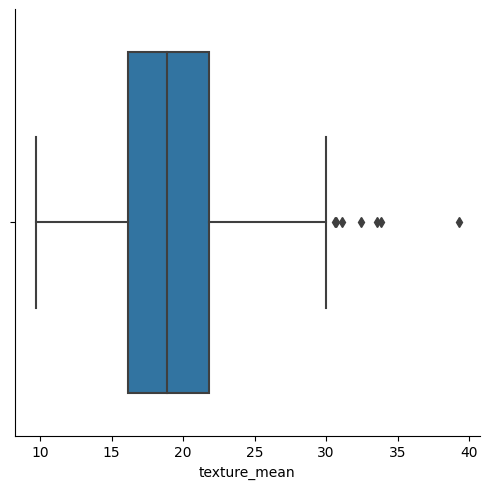

In [ ]:
sns.catplot(x='texture_mean',kind='box',data=df)

IQR 362.40000000000003


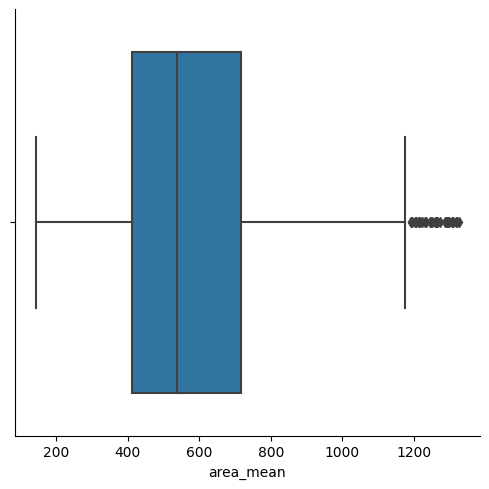

In [ ]:
Ql=df['area_mean'].quantile(.25)
Q3=df['area_mean'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['area_mean']>lb) & (df['area_mean']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='area_mean',kind='box',data=dfout)

In [ ]:
Ql=df['texture_mean'].quantile(.25)
Q3=df['texture_mean'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR
Ql=df['perimeter_mean'].quantile(.25)
Q3=df['perimeter_mean'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR




IQR -398.5
IQR -316.20000000000005


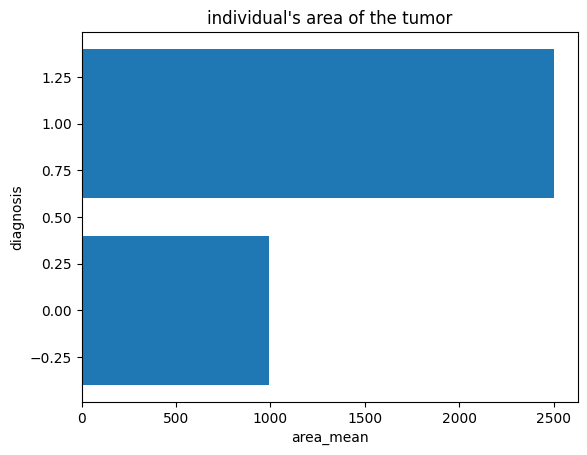

In [ ]:
plt.barh(df['diagnosis'],df['area_mean'])
plt.title("individual's area of the tumor")
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

<BarContainer object of 2 artists>

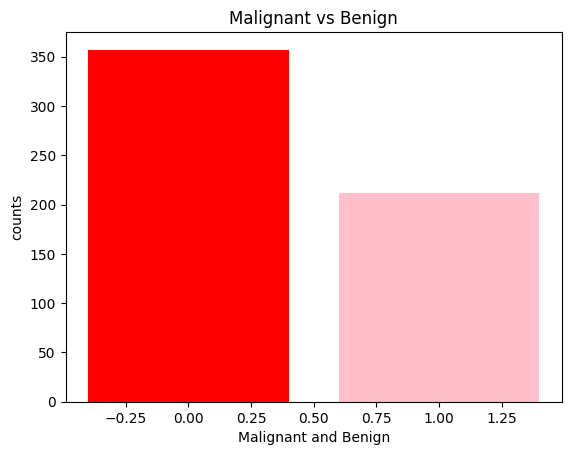

In [ ]:
data=df['diagnosis'].value_counts()
plt.title('Malignant vs Benign')
plt.xlabel('Malignant and Benign')
plt.ylabel('counts')
plt.bar(data.index,data.values,color=['red','pink'])

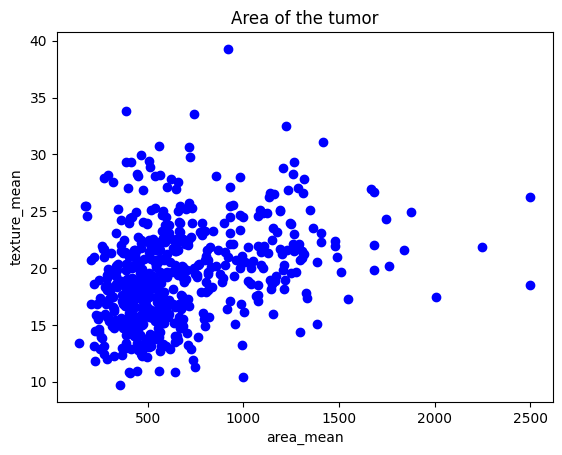

In [ ]:
plt.plot(df['area_mean'],df['texture_mean'],linewidth=0,marker='o',color='blue')
plt.title('Area of the tumor')
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.show()


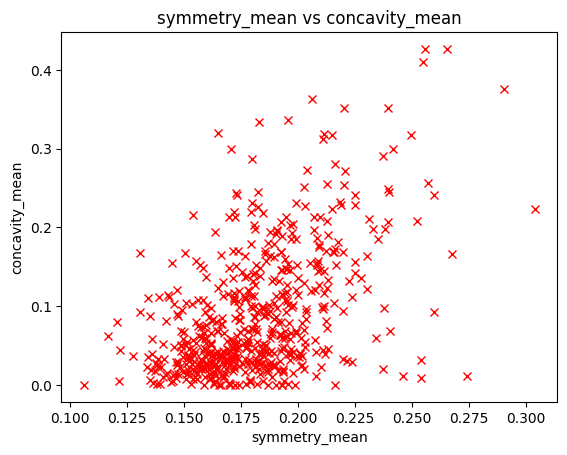

In [ ]:
plt.plot(df['symmetry_mean'],df['concavity_mean'],linewidth=0,marker='x',color='red')
plt.title('symmetry_mean vs concavity_mean')
plt.xlabel('symmetry_mean')
plt.ylabel('concavity_mean')
plt.show()


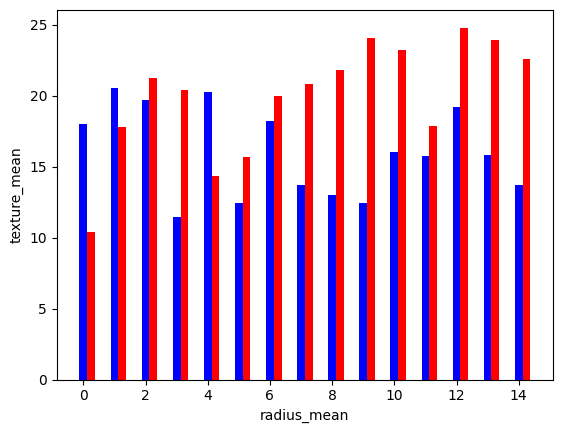

In [ ]:
N=15
ind=np.arange(N)
width = 0.25
xval=df['radius_mean'].head(15)
bar1=plt.bar(ind,xval,width,color='b')
plt.xlabel('radius_mean')

yval=df['texture_mean'].head(15)
plt.ylabel('texture_mean')
bar2=plt.bar(ind+width,yval,width,color='r')

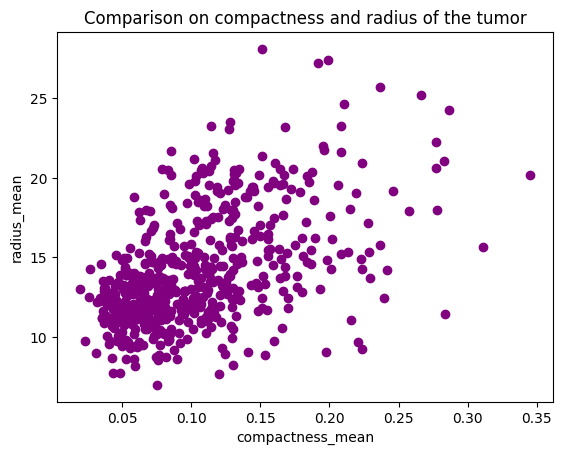

In [ ]:
x=df['compactness_mean']
plt.xlabel('compactness_mean')
plt.ylabel('radius_mean')
plt.title('Comparison on compactness and radius of the tumor')
y=df['radius_mean']
plt.scatter(x,y,c='purple')

([<matplotlib.patches.Wedge at 0x7f71c2e05180>,
 [Text(-0.4286546999573329, 1.0130425204326268, '0'),
  Text(0.428654605109445, -1.013042560566172, '1')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

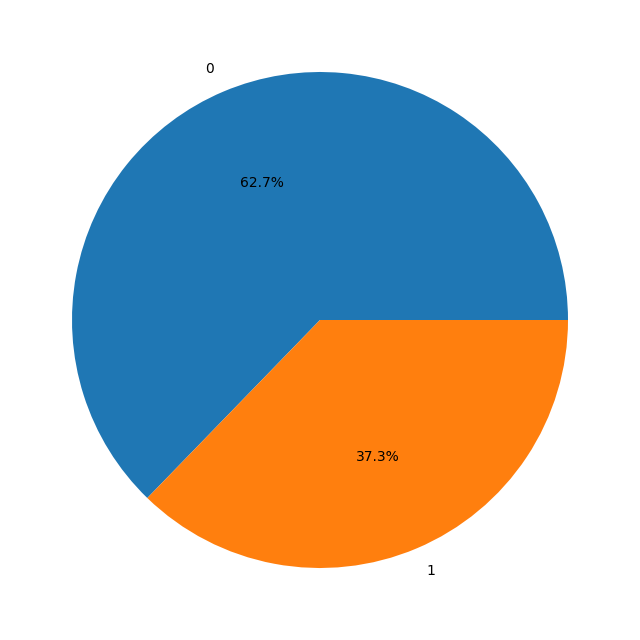

In [ ]:
data=df['diagnosis'].value_counts()
data
plt.figure(figsize=(8, 15))
plt.pie(data.values,labels=data.index,autopct='%1.1f%%')

0-benign tumor,M-malignant tumor

In [ ]:
x=df.iloc[:,1:-1]
print(x[0:10])

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   
7          1        13.71         20.83           90.20      577.9   
8          1        13.00         21.82           87.50      519.8   
9          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017  

In [ ]:
y=df.iloc[:,1].values
print(y[0:-1])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0]
[0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

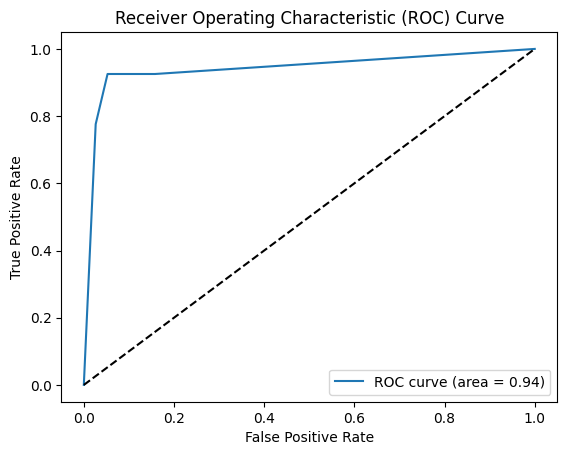

In [ ]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[72  4]
 [ 5 62]]
Accuracy:  0.9370629370629371
Specificity:  0.9473684210526315
Recall:  0.9253731343283582
Precision:  0.9393939393939394
F1-score:  0.9323308270676692
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.94      0.93      0.93        67

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

True positive:  62
True negative:  72


Decision tree classification


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [ ]:
dtree=clf.fit(x_train, y_train)

In [ ]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

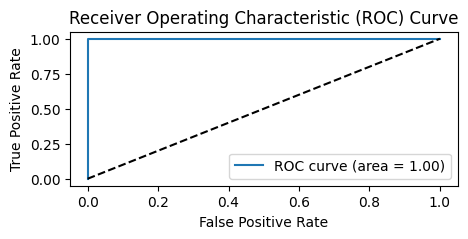

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)
y_pred_proba = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.figure(figsize=(5,2))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[90  0]
 [ 0 53]]
Accuracy:  1.0
Specificity:  1.0
Recall:  1.0
Precision:  1.0
F1-score:  1.0
AUC score:  1.0
True positive:  53
True negative:  90


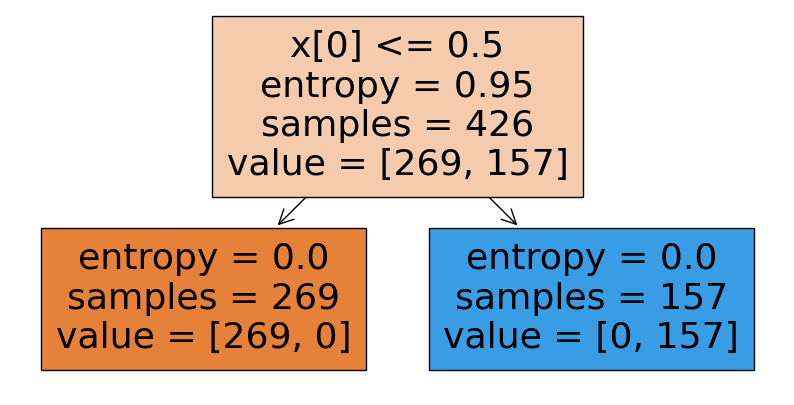

In [ ]:
plt.figure(figsize=(10,5))
tree.plot_tree(dtree, filled=True)
plt.show()

In [ ]:
dtree1=clf.fit(x_train, y_train)

In [ ]:
y_pred1 = dtree1.predict(x_test)

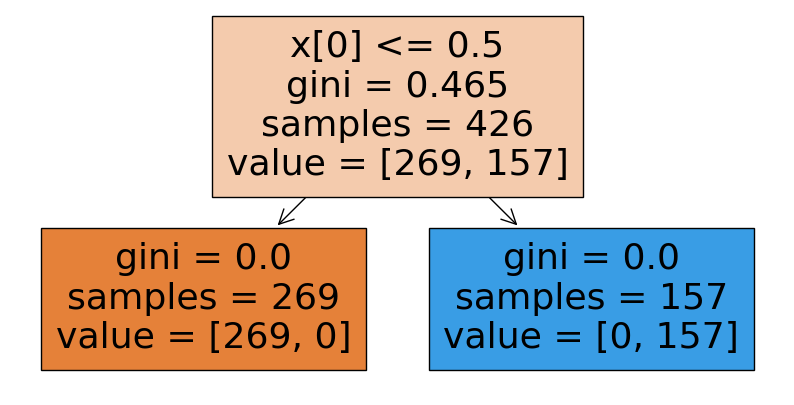

In [ ]:
plt.figure(figsize=(10,5))
tree.plot_tree(dtree1, filled=True)
plt.show()

Regression Analysis

In [ ]:
x = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean']]
y = df[['diagnosis']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True)

print(x_train.shape)
print(x_test.shape)

(426, 8)
(143, 8)


In [ ]:
x = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean']]
y = df['diagnosis']
model=LinearRegression()
model. fit(x,y)

print (model. coef_)


[ 4.68804236e-01  2.18554669e-02 -4.73331041e-02 -9.22244404e-04
  5.13892252e+00  3.08041374e-01  2.09732795e+00  1.27391183e+00]


In [ ]:
y_test=np.array(y_test).reshape(-1,1)
y_pred=model.predict(x_test)
print(y_pred)

[ 1.00090096e+00  6.11365530e-02  3.79935520e-01  2.65135003e-01
  4.53658929e-01  4.68234124e-01  2.97506989e-01  3.15717221e-01
  3.45360693e-01  2.54428352e-01  3.30077804e-01  6.99688021e-01
  1.06211442e-01  7.79259799e-01  9.89521126e-02  1.27240549e+00
  2.62880191e-02  1.09567370e+00  7.60173264e-01  4.01319000e-01
  1.05528073e+00 -4.55294615e-03  9.12886219e-01  1.07233927e+00
 -3.73077684e-02  6.98856975e-01  2.68442284e-01 -2.45200379e-01
  1.79895851e-01  7.22988502e-01  7.22824114e-02  3.62436632e-01
  3.47844933e-02  6.59509722e-01 -4.94251021e-02  1.08227221e+00
  1.57345949e+00 -9.65193128e-03  4.07996108e-01  2.18661944e-03
  1.98834687e-01  2.87497268e-01  9.15576332e-02  3.18610426e-01
  1.72528732e+00  7.67694140e-01  2.36515825e-01  7.72889862e-01
  1.02041209e+00  4.74714113e-02  6.32452729e-01  7.18550412e-02
 -3.65423180e-01  1.24220988e+00  7.58789955e-01  6.94130832e-01
 -3.16401363e-02  6.10826732e-01  5.21328367e-01  6.65363951e-01
  2.29128831e-01 -2.19055

In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 0.23157402998834883
Mean squared error: 0.07980317841984919
variance score: 0.6689867757591286
Root Mean Squared Error: 0.28249456352264407
